In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

ModuleNotFoundError: No module named 'skimage'

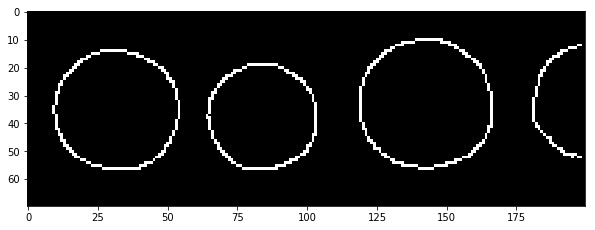

In [13]:
image = img_as_ubyte(data.coins()[160:230, 70:270])
edges = canny(image, sigma = 3, low_threshold=10, high_threshold = 50)


fig, ax = plt.subplots(1,1, figsize = (10,4))
ax.imshow(edges, cmap = 'gray')
plt.show()

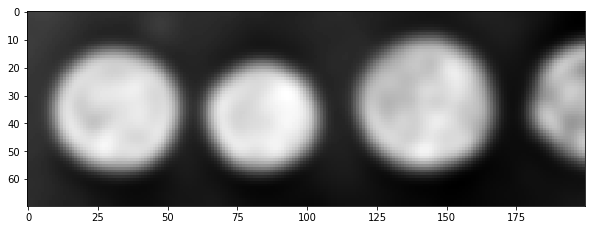

In [14]:
from skimage.filters import gaussian
gaussian_image = gaussian(image,sigma = 3)
fig, ax0 = plt.subplots(1,1, figsize = (10,20))
ax0.imshow(gaussian_image, cmap = 'gray', interpolation = 'nearest')
plt.show()

In [185]:
hough_radii = np.arange(15,25,1)
hough_res = hough_circle(edges, hough_radii)
hough_res.shape

(10, 70, 200)

In [186]:
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks = 3)
radii

array([19, 23, 22])

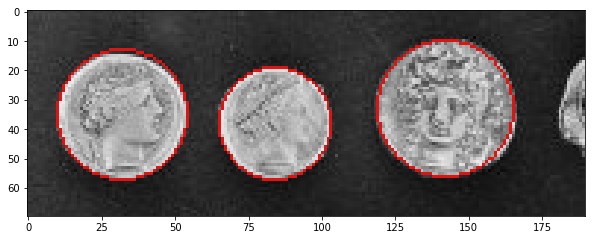

In [187]:
fig, ax = plt.subplots(1,1, figsize = (10,4))
image = img_as_ubyte(data.coins()[160:230, 70:260])
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius)
    image[circy, circx] = (220,20,20)

ax.imshow(image, cmap = 'gray', interpolation = 'nearest')
plt.show()

# My own picture

(7019, 5100)
(6225, 4965)


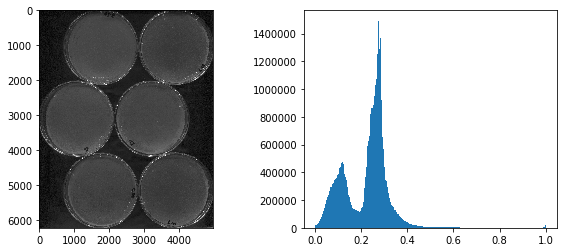

In [2]:
scanned_image = data.imread('f:/20170612_sco1839/img_096.jpg', as_grey = True)
print(scanned_image.shape)

cropped_image = scanned_image[695:6920,70:5035]
print(cropped_image.shape)
fig, ax = plt.subplots(1,2, figsize = (10,4))
ax[0].imshow(cropped_image, cmap = 'gray', interpolation = 'nearest')
ax[1].hist(cropped_image.ravel(), bins = 225, histtype = 'stepfilled')
plt.show()

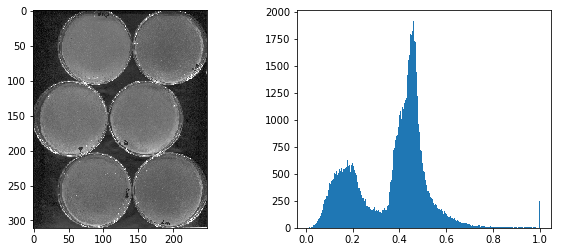

In [8]:
from skimage.transform import rescale
from skimage import exposure
resized_image = rescale(cropped_image, 0.05, mode = 'reflect')
resized_image = exposure.rescale_intensity(resized_image, in_range=(0,0.6))
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].imshow(resized_image, cmap = 'gray', interpolation = 'nearest')
ax[1].hist(resized_image.ravel(), bins = 255, histtype = 'stepfilled')
plt.show()

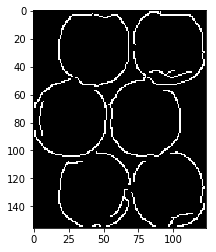

In [4]:
from skimage import io, color, img_as_ubyte
from skimage.feature import canny
from skimage.transform import hough_ellipse
from skimage.draw import ellipse_perimeter

edges = canny(resized_image, sigma = 2)

fig, ax = plt.subplots(1,1)
ax.imshow(edges, cmap = 'gray', interpolation = 'nearest')
plt.show()

In [23]:
import time
import ipywidgets
from skimage.morphology import binary_closing, disk, erosion


def func(a, threshold):
    t0 = time.time()
    closing = binary_closing(resized_image>threshold, disk(a))
    plt.imshow(closing, cmap = 'gray')
    plt.show()
    erosed = erosion(np.invert(closing))
    plt.imshow(erosed, cmap = 'gray')
    plt.show()
    t1 = time.time()
    print(t1-t0)

ipywidgets.interact(func, a = 5, threshold = 0.32)


<function __main__.func>

In [ ]:
best = list(result[-1])
yc, xc, a, b = [int(round(x)) for x in best[1:5]]
orientation = best[5]

image_rgb = resized_image.copy()
cy, cx = ellipse_perimeter(yc, xc, a, b, orientation)
image_rgb[cy, cx] = (255, 255, 1)
edges_draw = color.gray2rgb(img_as_ubyte(edges.copy()))
edges_draw[cy,cx] = (1,255,255)

fig, (ax1, ax2) = plt.subplots(1,2, figsize = (10,5))
ax1.imshow(image_rgb)
ax2.imshow(edges)
plt.show()